In [26]:
install.packages("quantmod")
install.packages("xts")
install.packages("PerformanceAnalytics")
install.packages("rugarch")
install.packages("ggplot2")
install.packages(c("dplyr", "magrittr"))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [27]:
library(quantmod)
library(xts)
library(PerformanceAnalytics)
library(rugarch)
library(ggplot2)
library(dplyr)
library(magrittr)

In [28]:
# Read the CSV file
data <- read.csv("vicStock.csv")

In [29]:
print(sum(is.na(data$ticker)))

[1] 0


In [30]:




# Convert 'time' column to Date format
data$time <- as.Date(data$time)

# Create an xts object
ts_data <- xts(data[, -7], order.by = data$time)

# Print the time series data
print(ts_data)



                 time   open   high    low  close   volume
2014-01-02 2014-01-02  19657  19797  19516  19657    74950
2014-01-03 2014-01-03  19657  19797  19516  19797    91920
2014-01-06 2014-01-06  19797  19797  19516  19797   111760
2014-01-07 2014-01-07  19797  19797  19657  19797   294120
2014-01-08 2014-01-08  19657  19797  19657  19657   109890
2014-01-09 2014-01-09  19657  19797  19516  19797   185370
2014-01-10 2014-01-10  19937  20078  19797  19937   143010
2014-01-13 2014-01-13  20078  20078  19797  19937   102090
2014-01-14 2014-01-14  19937  19937  19797  19797   111540
2014-01-15 2014-01-15  19657  19937  19657  19797   165250
       ...                                                
2024-02-28 2024-02-28  45900  46400  45250  45600  3369700
2024-02-29 2024-02-29  46000  46150  45000  45000  4017000
2024-03-01 2024-03-01  45000  45600  44850  45250  2982700
2024-03-04 2024-03-04  45300  45750  45150  45250  3738900
2024-03-05 2024-03-05  45200  45500  45000  45300  31518

In [31]:
print(sum(is.na(data$ticker)))

[1] 0


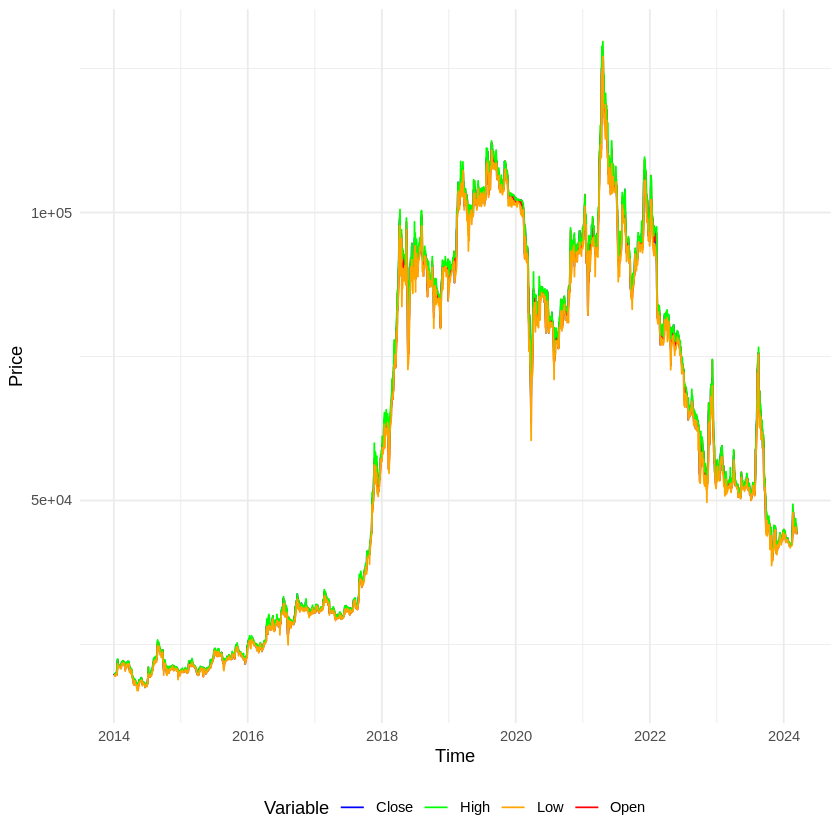

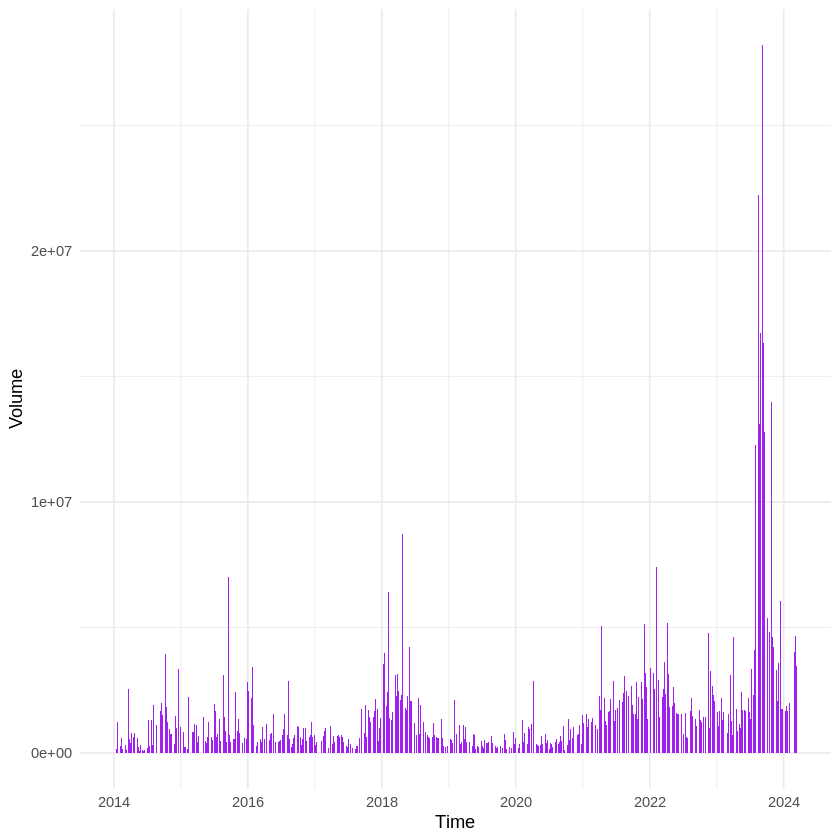

In [32]:
# Chuyển cột 'time' sang định dạng ngày
data$time <- as.Date(data$time)

# Biểu đồ cho dữ liệu giá
price_plot <- ggplot(data, aes(x = time)) +
  geom_line(aes(y = close, color = "Close")) +
  geom_line(aes(y = open, color = "Open")) +
  geom_line(aes(y = high, color = "High")) +
  geom_line(aes(y = low, color = "Low")) +
  labs(x = "Time", y = "Price", color = "Variable") +
  scale_color_manual(values = c("Close" = "blue", "Open" = "red", "High" = "green", "Low" = "orange")) +
  theme_minimal() +
  theme(legend.position = "bottom")

# Biểu đồ cho dữ liệu khối lượng giao dịch
volume_plot <- ggplot(data, aes(x = time)) +
  geom_bar(aes(y = volume), fill = "purple", stat = "identity") +
  labs(x = "Time", y = "Volume") +
  theme_minimal()

# Hiển thị biểu đồ giá và biểu đồ khối lượng giao dịch cùng lúc
price_plot
volume_plot

In [33]:
print(sum(is.na(data$ticker)))

[1] 0


Như ta có thể nhìn thấy trên biểu đồ, giá cổ phiếu của VIC những biến đổi rất mạnh mẽ qua thời gian, thay vì sử dụng dữ liệu trên, chúng ta sẽ sử dụng Tỉ suất lợi nhuận hàng ngày (Daily return) để có cái nhìn rõ hơn về sự biến đổi của giá cổ phiếu theo thời gian, vì 2 lý do sau:

Tỷ suất lợi nhuận hàng ngày bắt được biến động ngắn hạn: Giá cổ phiếu có thể biến động mạnh (như trường hợp trên), sử dụng tỷ suất lợi nhuận hàng ngày giúp bắt được biến động này. Tỷ suất lợi nhuận hàng ngày được tính toán là tỷ suất phần trăm (Giá đóng cửa ngày sau - Giá đóng cửa ngày trước)/Giá đóng cửa ngày trước, điều này cho phép phân tích chính xác hơn các biến động hàng ngày trong giá cổ phiếu.

Tỷ suất lợi nhuận hàng ngày là chuỗi thời gian có tính dừng: Tính dừng (stationary) là một giả định quan trọng trong nhiều mô hình chuỗi thời gian, bao gồm mô hình GARCH. Tỷ suất lợi nhuận hàng ngày đã được phát hiện là một chuỗi thời gian có tính dừng, có nghĩa là nó có một trung bình và phương sai không đổi theo thời gian. Điều này cho phép sử dụng các mô hình chuỗi thời gian như GARCH để phân tích và dự báo giá cổ phiếu trong tương lai.

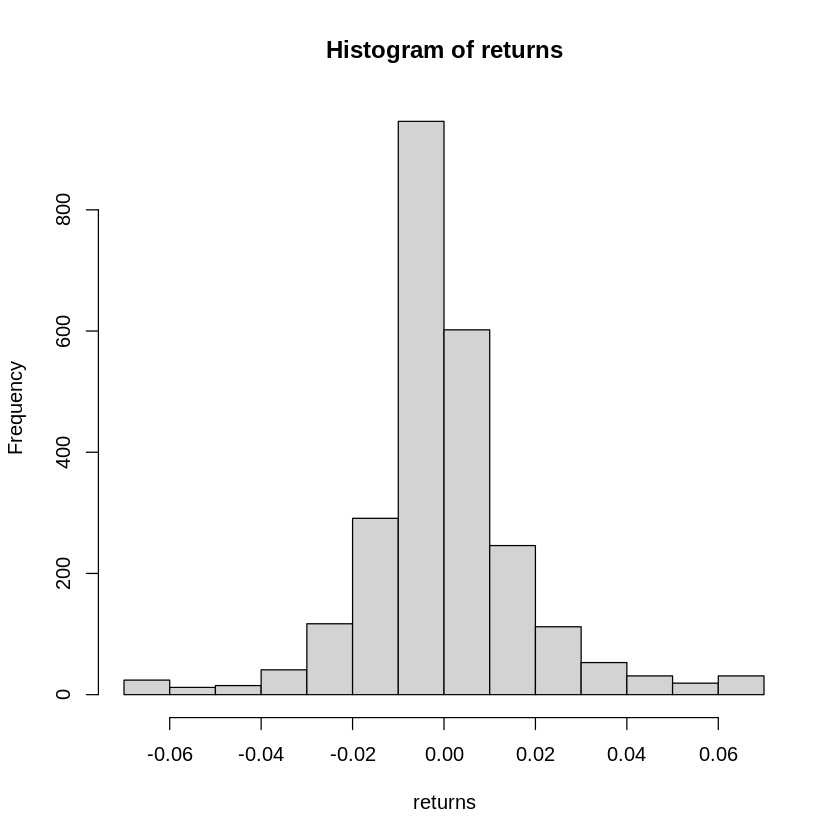

In [34]:
# Đọc dữ liệu từ file CSV
data <- read.csv("vicStock.csv")

# Lấy cột giá đóng của ticker VIC
data_close <- data[data$ticker == "VIC", "close"]

# Convert data_close to an xts object
data_close_xts <- xts(data_close, order.by = as.Date(data[data$ticker == "VIC", "time"]))

# Tính toán lợi nhuận hàng ngày
returns <- Return.calculate(data_close_xts)

# Xóa dòng đầu tiên
returns <- returns[-1]

# Vẽ biểu đồ phân phối
hist(returns)


In [35]:
print(sum(is.na(data$ticker)))

[1] 0


Biểu đồ tần xuất cho thấy, đa số Tỉ suất lợi nhuận hàng ngày rơi vào khoảng với tỉ suất tương đối nhỏ (-0.03 đến 0.03). Có một số quan sát ngoại suất rơi vào các khoảng lớn hơn.

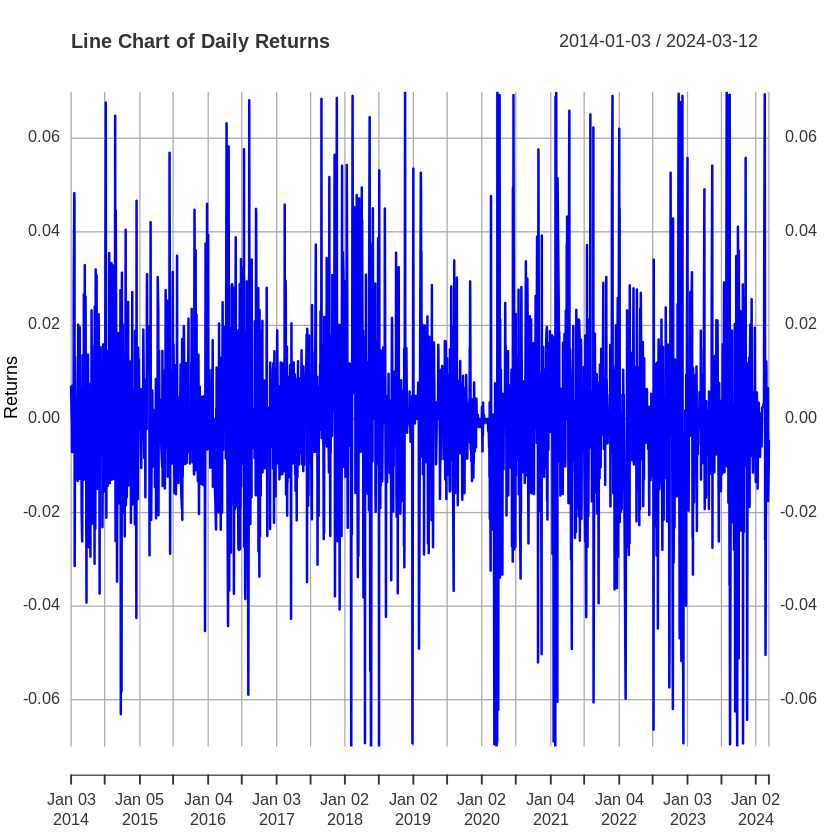

In [36]:
# Vẽ biểu đồ line chart của returns
plot(returns, type = "l", col = "blue", main = "Line Chart of Daily Returns", ylab = "Returns")

# Tính toán ngưỡng cho các ngoại lệ
upper_threshold <- quantile(returns, 0.975)
lower_threshold <- quantile(returns, 0.025)

# Vẽ đường ngưỡng
abline(h = c(upper_threshold, lower_threshold), col = c("red", "green"), lty = c(2, 2))



In [37]:
print(sum(is.na(data$ticker)))

[1] 0


Nhìn vào biểu đồ trên ta có thể thấy rằng, các dữ liệu của Tỉ suất lợi nhuận hàng ngày thể hiện tính dừng, không xuất hiện trend hay tính mùa vụ trong dữ liệu. Tuy nhiên, ta cũng có thể thấy thị trường có biết động nhẹ hơn trong khoảng thời gian đầu năm 2020

In [38]:
# Convert 'close' column to numeric
data$time <- as.Date(data$time)
stock_xts <- xts(data[, c("open", "high", "low", "close", "volume")], order.by = data$time)
stock_xts$close <- as.numeric(as.character(stock_xts$close))
print(stock_xts)


            open  high   low close  volume
2014-01-02 19657 19797 19516 19657   74950
2014-01-03 19657 19797 19516 19797   91920
2014-01-06 19797 19797 19516 19797  111760
2014-01-07 19797 19797 19657 19797  294120
2014-01-08 19657 19797 19657 19657  109890
2014-01-09 19657 19797 19516 19797  185370
2014-01-10 19937 20078 19797 19937  143010
2014-01-13 20078 20078 19797 19937  102090
2014-01-14 19937 19937 19797 19797  111540
2014-01-15 19657 19937 19657 19797  165250
       ...                                
2024-02-28 45900 46400 45250 45600 3369700
2024-02-29 46000 46150 45000 45000 4017000
2024-03-01 45000 45600 44850 45250 2982700
2024-03-04 45300 45750 45150 45250 3738900
2024-03-05 45200 45500 45000 45300 3151800
2024-03-06 45300 46850 45200 45300 4652500
2024-03-07 45600 45850 45350 45600 2466500
2024-03-08 46000 46000 44800 44800 3896700
2024-03-11 44900 45250 44350 44350 3451600
2024-03-12 44350 44600 44050 44150 2836600


In [39]:
print(sum(is.na(data$ticker)))

[1] 0


In [40]:
# Đọc dữ liệu từ tệp CSV
data <- read.csv("vicStock.csv")

# Chuyển đổi cột "close" sang lợi suất hàng ngày
data$returns <- c(NA, diff(log(data$close)))

# Tính độ biến động hàng năm từ độ lệch chuẩn của lợi suất hàng ngày
annual_volatility <- function(returns_daily) {
  # Độ lệch chuẩn của lợi suất hàng ngày
  daily_std <- sd(returns_daily, na.rm = TRUE)

  # Số ngày giao dịch trong một năm
  trading_days_per_year <- 252

  # Tính độ biến động hàng năm
  annual_volatility <- daily_std * sqrt(trading_days_per_year)

  return(annual_volatility)
}

# Tính toán độ biến động hàng năm cho lợi suất hàng ngày
vic_annual_volatility <- annual_volatility(data$returns)

# In ra kết quả
print(vic_annual_volatility)


[1] 0.2881198


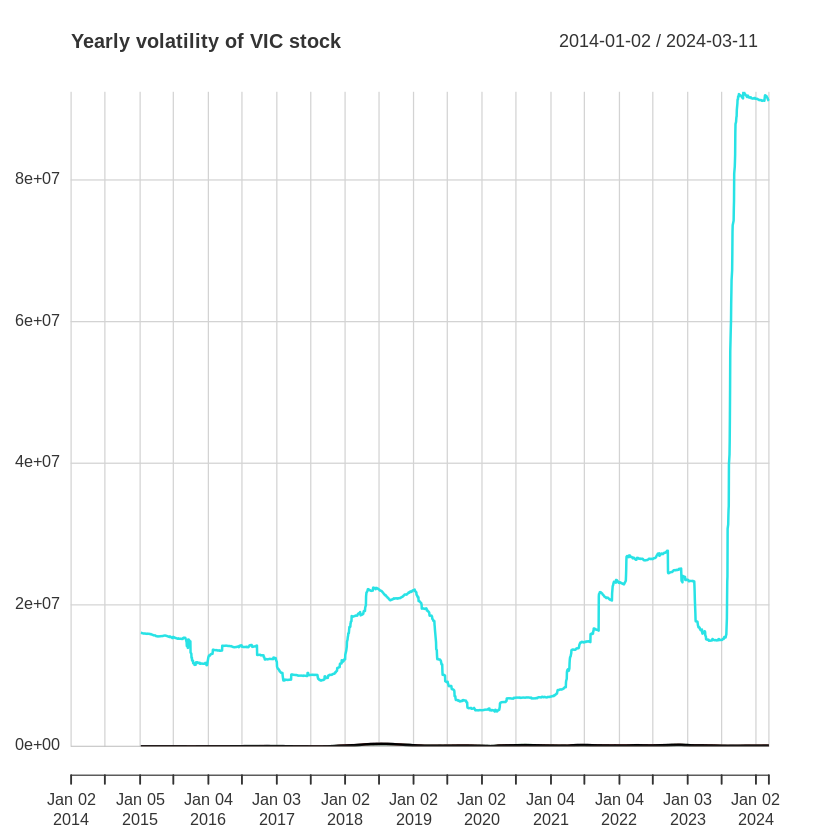

In [63]:
# Đọc dữ liệu từ tệp CSV
stock_data <- suppressWarnings(read.csv("vicStock.csv"))

# Chuyển đổi cột thời gian sang định dạng ngày tháng
stock_data$time <- as.Date(stock_data$time)

# Lấy dữ liệu trong khoảng thời gian "2014::2024" từ dataframe stock_data
return_subset <- subset(stock_data, time >= as.Date("2014-01-02") & time <= as.Date("2024-03-11"))

# Remove rows with missing values
return_subset <- na.omit(return_subset)

# Sử dụng hàm chart.RollingPerformance trên dữ liệu đã lọc
suppressWarnings(chart.RollingPerformance(R = return_subset,
                         width = 252,
                         FUN = "sd.annualized",
                         scale = 252,
                         main = "Yearly volatility of VIC stock"))


In [43]:
print(sum(is.na(data$ticker)))

[1] 0


Chúng ta có thể thấy độ biến động hàng năm tương đối lớn.

Mô hình 4: AR(1) GJR-GARCH

Đây là một mô hình dự báo biến động giá cổ phiếu trong tài chính, nó là sự kết hợp giữa mô hình AR(1), mô hình GJR-GARCH và phương pháp điều chỉnh tăng trưởng logarit (log-return).

Mô hình AR(1) GJR-GARCH được sử dụng để mô tả giá trị cổ phiếu trong thị trường tài chính, trong đó giá trị cổ phiếu được xem như là một quá trình ngẫu nhiên. Mô hình này sử dụng một mô hình autoregressive (AR) để mô tả giá trị cổ phiếu và một mô hình GJR-GARCH để mô tả biến động của giá trị cổ phiếu.

Mô hình AR(1) GJR-GARCH có thể được sử dụng để dự báo biến động giá trong tương lai, dựa trên các thông tin lịch sử về giá cổ phiếu.

In [60]:
# Đặc điểm của mô hình AR(1) GJR-GARCH
s <- ugarchspec(mean.model = list(armaOrder = c(1,0)),
                variance.model = list(model = "gjrGARCH"),
                distribution.model = 'sstd')
data$returns <- c(NA, diff(log(data$close)))
# Ước lượng mô hình trên dữ liệu
m <- ugarchfit(data = returns, spec = s)

# Hiển thị kết quả
print(m)



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: gjrGARCH(1,1)
Mean Model	: ARFIMA(1,0,0)
Distribution	: sstd 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.000025    0.000265  0.094463 0.924741
ar1    -0.017064    0.019650 -0.868405 0.385172
omega   0.000038    0.000010  3.946435 0.000079
alpha1  0.329166    0.056118  5.865648 0.000000
beta1   0.664603    0.046096 14.417892 0.000000
gamma1  0.010246    0.062187  0.164760 0.869133
skew    1.032589    0.022123 46.675413 0.000000
shape   2.842050    0.142126 19.996640 0.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.000025    0.000274  0.091294 0.927259
ar1    -0.017064    0.019405 -0.879362 0.379205
omega   0.000038    0.000020  1.944076 0.051886
alpha1  0.329166    0.056717  5.803620 0

In [49]:
print(sum(is.na(data$ticker)))

[1] 0


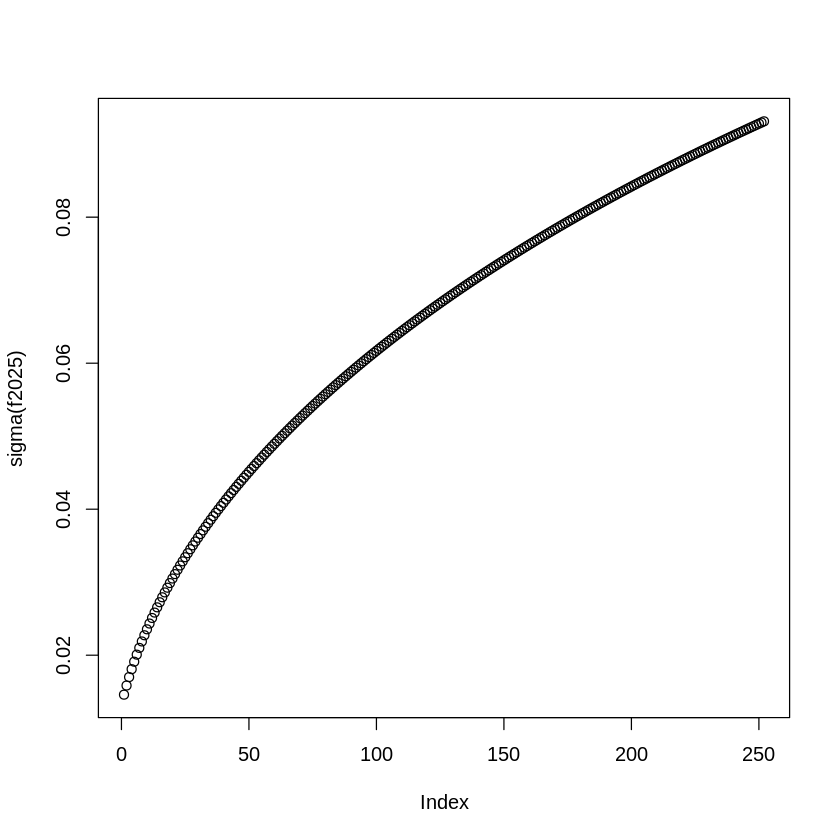

In [50]:
# Đọc dữ liệu từ tệp CSV
stock_data <- read.csv("vicStock.csv")

# Chuyển cột 'date' sang định dạng ngày
stock_data$date <- as.Date(stock_data$time)

# Chuẩn bị dữ liệu cho mô hình AR(1) GJR-GARCH
returns <- diff(log(stock_data$close))  # Tính toán lợi suất logarit
returns <- na.omit(returns)  # Loại bỏ các giá trị NA
s <- ugarchspec(mean.model = list(armaOrder = c(1, 0)),
                variance.model = list(model = "gjrGARCH"),
                distribution.model = "sstd")

# Ước lượng mô hình trên dữ liệu
m <- ugarchfit(data = returns, spec = s)

# Dự đoán giá trong 1 năm tiếp theo
f2025 <- ugarchforecast(fitORspec = m, n.ahead = 252)

# Biểu đồ cho dự đoán giá của cổ phiếu VIC trong năm tới
plot(sigma(f2025))


In [51]:
print(sum(is.na(data$ticker)))

[1] 0


In [52]:
sfinal <- s
setfixed(sfinal) <- as.list(coef(m))

In [53]:
print(sum(is.na(data$ticker)))

[1] 0


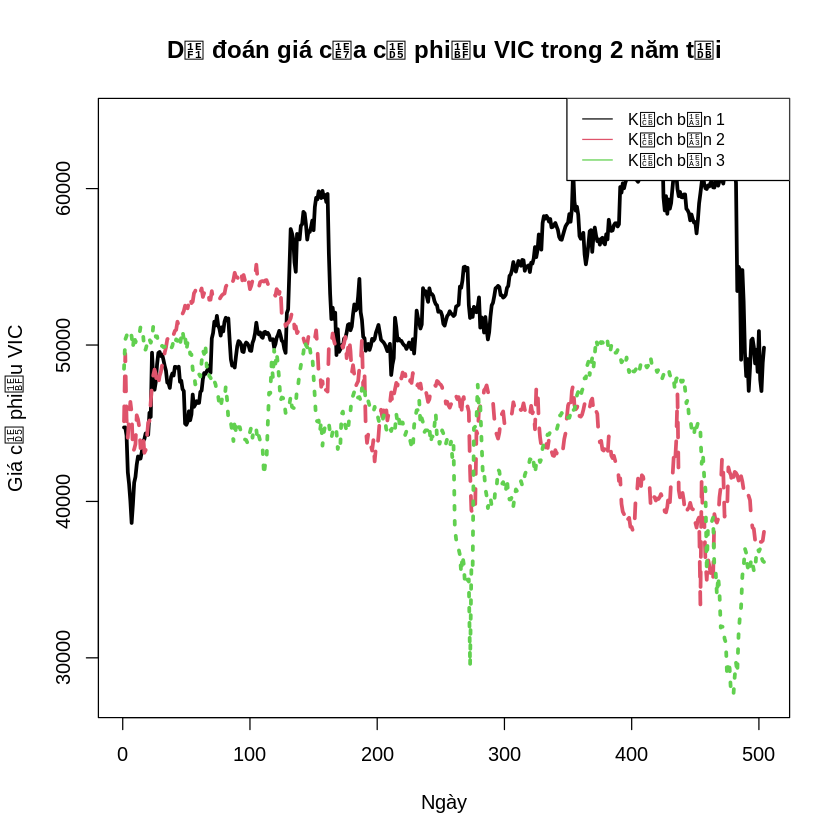

In [54]:
#Tạo 3 tình huống giá khác nhau cho giá cổ phiếu vic dự đoán trong 1 năm tới
sim <- ugarchpath(spec = sfinal,
                  m.sim = 3,
                  n.sim = 2*252,
                  rseed = 123)

#Dự đoán giá của cố phiếu vic trong năm năm tới, lựa chọn giá đóng cửa ngày 2024-01-29 làm điểm khởi đầu
p <- 42650*apply(fitted(sim), 2, 'cumsum') + 42650

# Vẽ biểu đồ
matplot(p, type = "l", lwd = 3,
        xlab = "Ngày", ylab = "Giá cổ phiếu VIC",
        main = "Dự đoán giá của cổ phiếu VIC trong 2 năm tới",
        col = 1:3)

# Thêm chú thích cho biểu đồ
legend("topright", legend = paste("Kịch bản", 1:3), col = 1:3, lty = 1, cex = 0.8)


Có xu hướng giảm nhẹ và tăng nhẹ trong cả 3 kịch bản

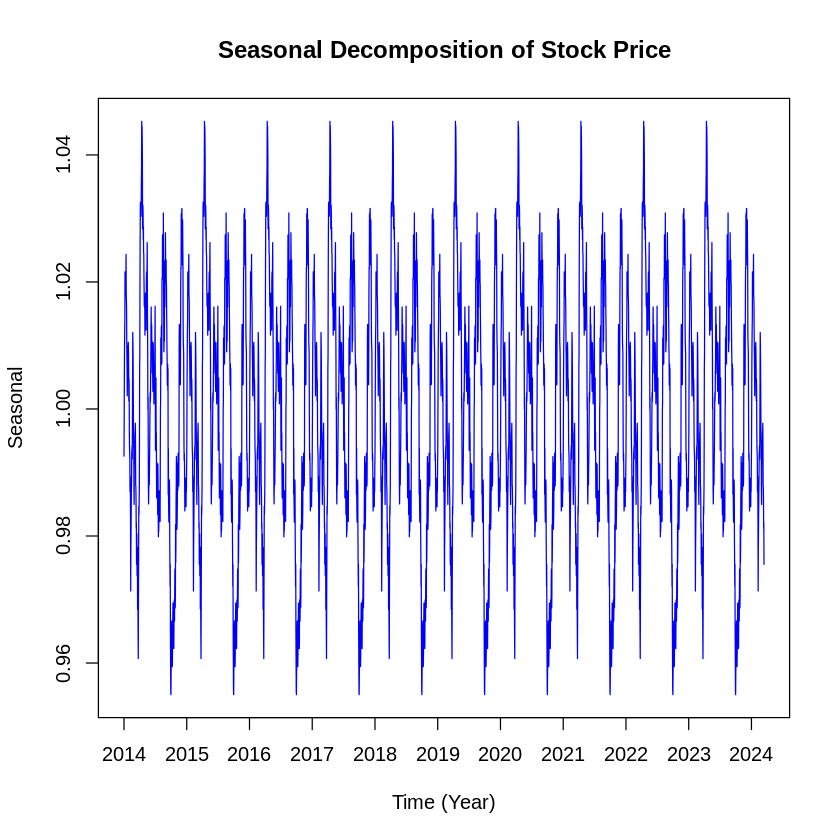

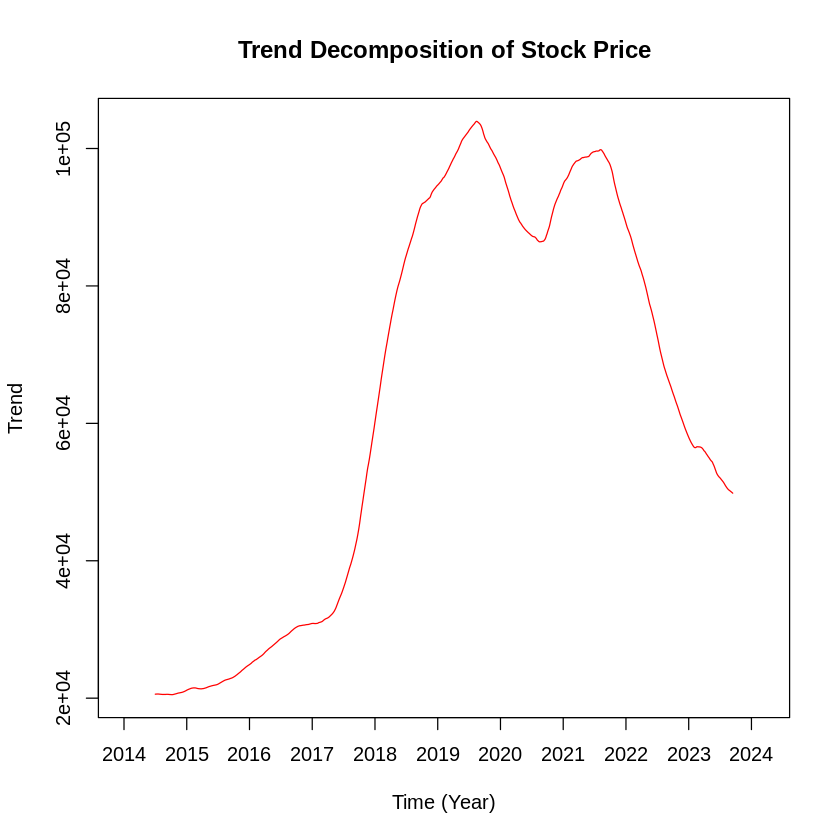

In [55]:
# Chuyển cột 'time' sang định dạng ngày
stock_data$time <- as.Date(stock_data$time)

# Lấy năm từ cột 'time' trong dữ liệu
years <- unique(format(stock_data$time, "%Y"))  # Lấy các năm duy nhất từ dữ liệu

# Tạo một chuỗi thời gian đầy đủ với tất cả các ngày trong khoảng thời gian
complete_time_series <- seq(min(stock_data$time), max(stock_data$time), by = "day")

# Tạo một dataframe mới với tất cả các ngày và giá cổ phiếu tương ứng
complete_stock_data <- merge(data.frame(time = complete_time_series), stock_data, by = "time", all.x = TRUE)

# Điền các giá trị thiếu bằng NA
complete_stock_data[is.na(complete_stock_data)] <- NA

# Tạo chuỗi thời gian từ dữ liệu hoàn chỉnh
ts_data <- ts(na.approx(complete_stock_data$close), frequency = 365) # Số ngày trong năm

# Phân tích thành phần thời gian
decomposition <- decompose(ts_data, type = "multiplicative")

# Biểu đồ thời vụ
par(mfrow=c(1,1)) # Đặt kích thước cho biểu đồ
plot(decomposition$seasonal, xlab = "Time (Year)", ylab = "Seasonal",
     main = "Seasonal Decomposition of Stock Price",
     type = "l", col = "blue", xaxt="n") # xaxt="n" để không vẽ trục x

# Thêm trục x với nhãn là năm
axis(1, at = seq_along(years), labels = years)

# Biểu đồ xu hướng
plot(decomposition$trend, xlab = "Time (Year)", ylab = "Trend",
     main = "Trend Decomposition of Stock Price",
     type = "l", col = "red", xaxt="n") # xaxt="n" để không vẽ trục x

# Thêm trục x với nhãn là năm
axis(1, at = seq_along(years), labels = years)
